


Este notebook explora o dataset do Titanic, famoso em Ciência de Dados, 
utilizando **Python, Pandas, Seaborn e Matplotlib**.  

Ele responde perguntas como:
- Qual a média de idade dos passageiros?
- Qual foi a taxa de sobrevivência por classe e sexo?
- Como as crianças se comportaram em relação à sobrevivência?


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo
sns.set(style="whitegrid")


## 📂 Carregando Dados

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Análise Geral dos Passageiros

In [3]:

# Média de idade
media_idade = df['Age'].mean()
print(f"Média de idade: {round(media_idade, 2)} anos")

# Total de sobreviventes
sobreviventes = df[df['Survived']==1]
print(f"Total de sobreviventes: {len(sobreviventes)}")

# Média de idade dos sobreviventes
print(f"Média de idade dos sobreviventes: {round(sobreviventes['Age'].mean(), 2)} anos")


Média de idade: 29.7 anos
Total de sobreviventes: 342
Média de idade dos sobreviventes: 28.34 anos


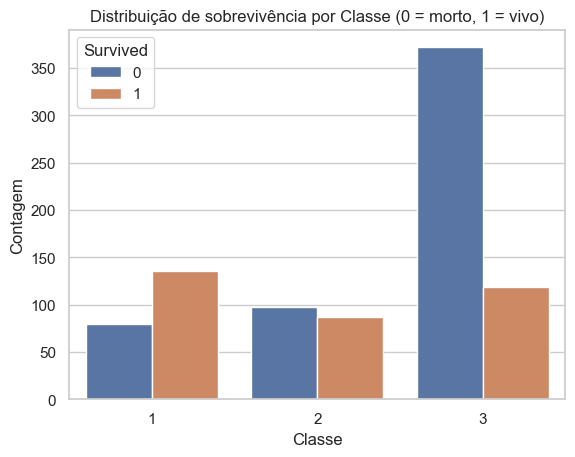

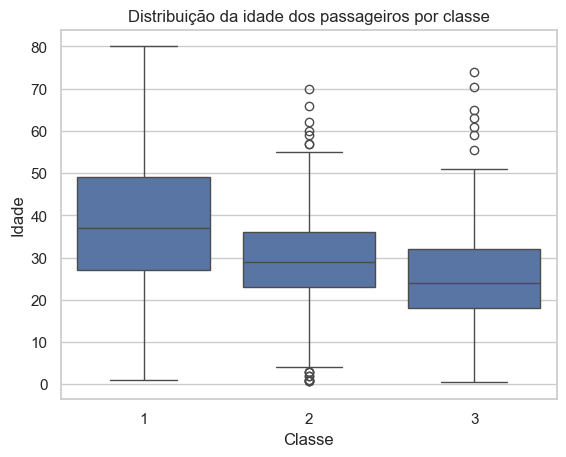

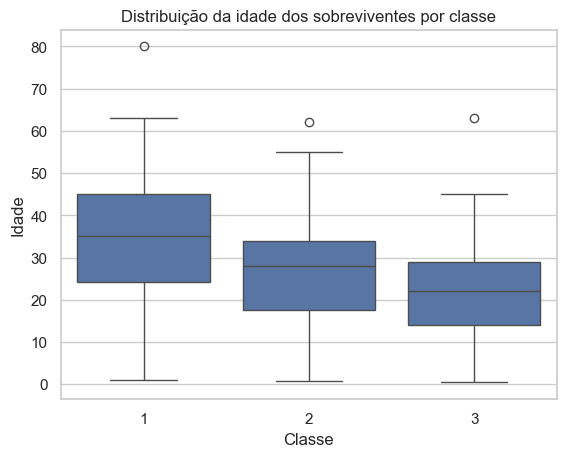

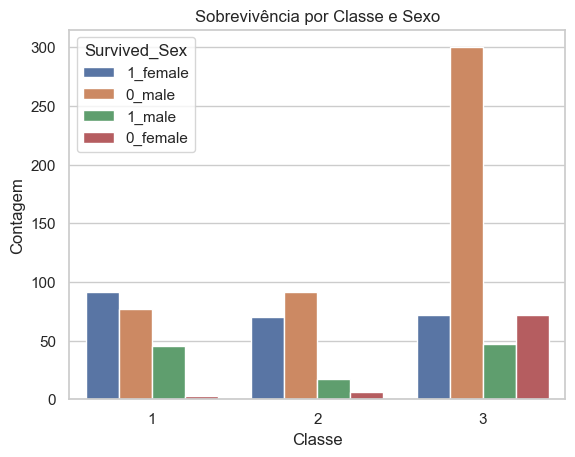

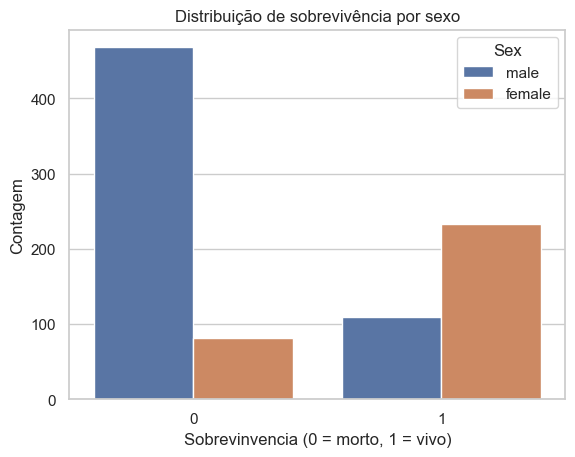

In [7]:

# Sobrevivência por classe
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Distribuição de sobrevivência por Classe (0 = morto, 1 = vivo)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Distribuição de idade por classe
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribuição da idade dos passageiros por classe')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

# Distribuição de idade dos sobreviventes por classe
sns.boxplot(x='Pclass', y='Age', data=sobreviventes)
plt.title('Distribuição da idade dos sobreviventes por classe')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

# Sobrevivência por classe e sexo
df['Survived_Sex'] = df['Survived'].astype(str) + '_' + df['Sex']
sns.countplot(x='Pclass', hue='Survived_Sex', data=df)
plt.title('Sobrevivência por Classe e Sexo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Distribuição da sobrevivência por sexo
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Distribuição de sobrevivência por sexo')
plt.xlabel('Sobrevinvencia (0 = morto, 1 = vivo)')
plt.ylabel('Contagem')
plt.show()


## 👶 Análise Focada nas Crianças (<= 11 anos)

In [10]:

criancas = df[df['Age']<=11]
print(f"Total de crianças: {len(criancas)}")
criancas_sobreviventes = criancas[criancas['Survived']==1]
print(f"Total de crianças sobreviventes: {len(criancas_sobreviventes)}")

print("\nNome e idade das crianças sobreviventes:")
print(criancas_sobreviventes[['Name', 'Age']])


Total de crianças: 68
Total de crianças sobreviventes: 39

Nome e idade das crianças sobreviventes:
                                                Name    Age
10                   Sandstrom, Miss. Marguerite Rut   4.00
43          Laroche, Miss. Simonne Marie Anne Andree   3.00
58                      West, Miss. Constance Mirium   5.00
78                     Caldwell, Master. Alden Gates   0.83
165  Goldsmith, Master. Frank John William "Frankie"   9.00
172                     Johnson, Miss. Eleanor Ileen   1.00
183                        Becker, Master. Richard F   1.00
184              Kink-Heilmann, Miss. Luise Gretchen   4.00
193                       Navratil, Master. Michel M   3.00
233                   Asplund, Miss. Lillian Gertrud   5.00
237                 Collyer, Miss. Marjorie "Lottie"   8.00
261                Asplund, Master. Edvin Rojj Felix   3.00
305                   Allison, Master. Hudson Trevor   0.92
340                   Navratil, Master. Edmond Roger   2.00


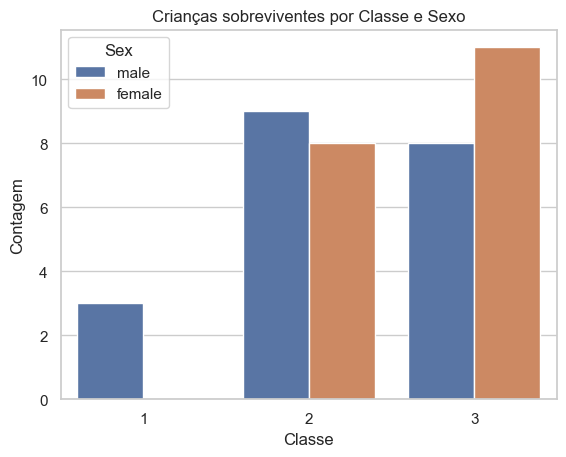

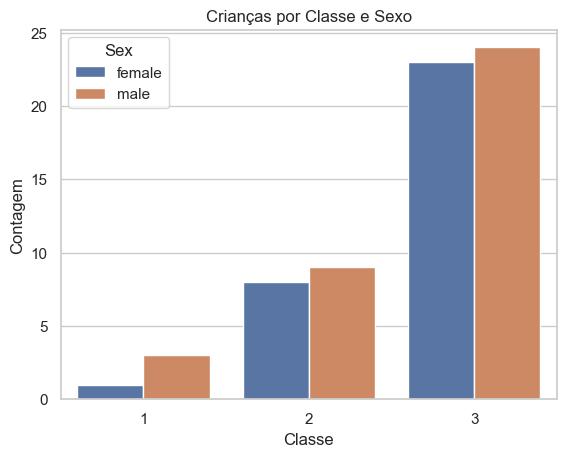

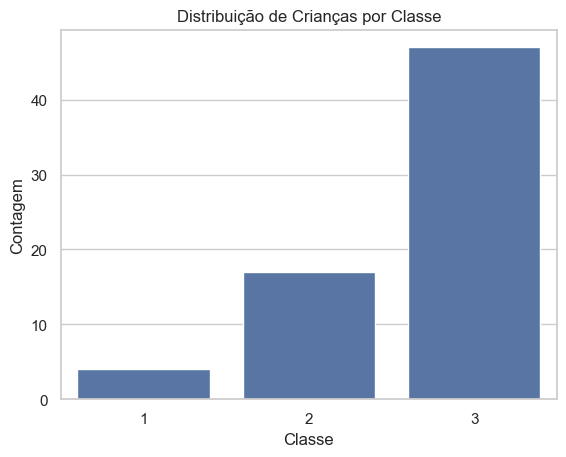

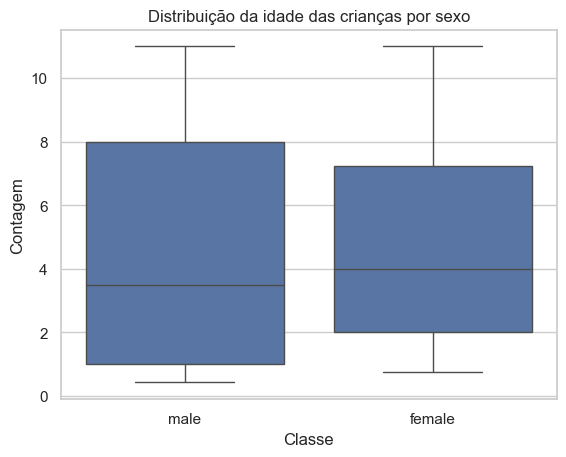

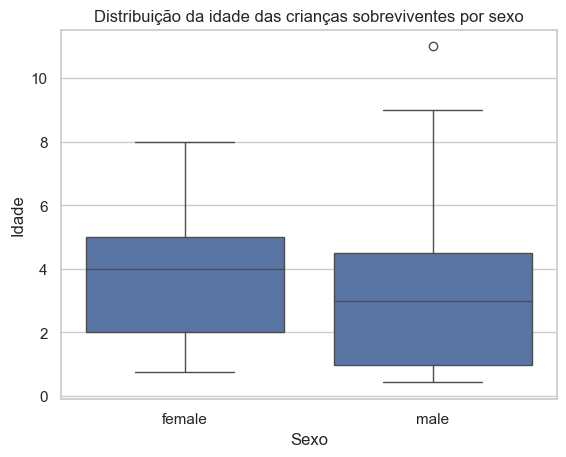

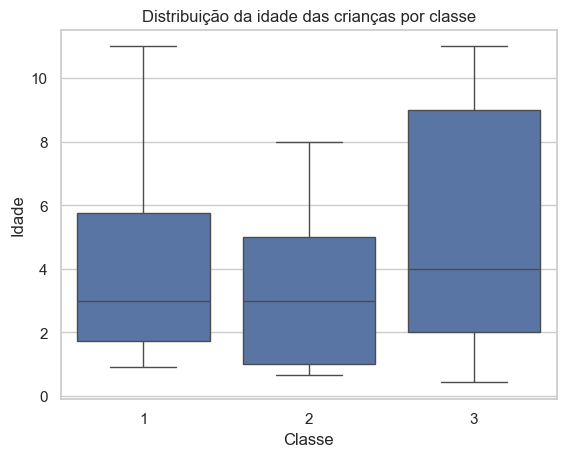

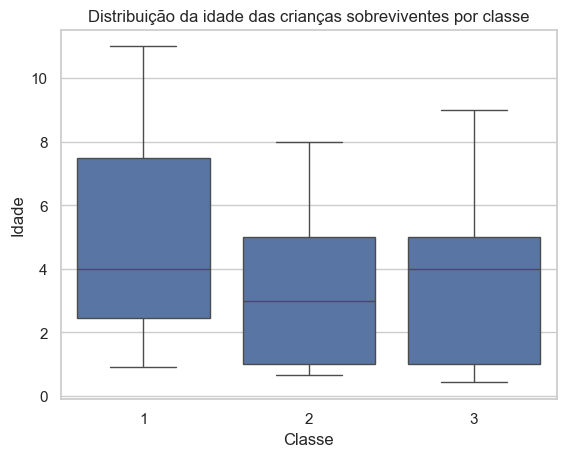

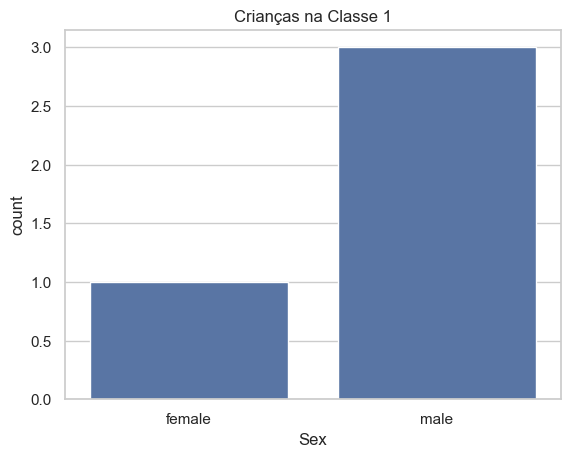

Total de crianças na classe 1: 4


In [13]:

# Crianças sobreviventes por classe e sexo
sns.countplot(x='Pclass', hue='Sex', data=criancas_sobreviventes)
plt.title('Crianças sobreviventes por Classe e Sexo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Crianças por classe e sexo
sns.countplot(x='Pclass', hue='Sex', data=criancas)
plt.title('Crianças por Classe e Sexo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Crianças por classe
sns.countplot(x='Pclass', data=criancas)
plt.title('Distribuição de Crianças por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Idade das crianças por sexo
sns.boxplot(x='Sex', y='Age', data=criancas)
plt.title('Distribuição da idade das crianças por sexo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Idade das crianças sobreviventes por sexo
sns.boxplot(x='Sex', y='Age', data=criancas_sobreviventes)
plt.title('Distribuição da idade das crianças sobreviventes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.show()

# Idade das crianças por classe
sns.boxplot(x='Pclass', y='Age', data=criancas)
plt.title('Distribuição da idade das crianças por classe')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

# Idade das crianças sobreviventes por classe
sns.boxplot(x='Pclass', y='Age', data=criancas_sobreviventes)
plt.title('Distribuição da idade das crianças sobreviventes por classe')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

# Crianças na classe 1
criancas_class1 = df[(df['Age']<=11) & (df['Pclass']==1)]
sns.countplot(x='Sex', data=criancas_class1)
plt.title('Crianças na Classe 1')
plt.show()

print(f"Total de crianças na classe 1: {len(criancas_class1)}")



## 📌 Conclusões
- A **classe 3** tinha o maior número de passageiros, mas também concentrou o maior número de mortes.  
- Passageiros da **classe 1**, especialmente mulheres e crianças, tiveram maiores chances de sobrevivência.  
- Crianças da **classe 3** representaram o maior grupo em número absoluto, mas nem todas sobreviveram.
- Nota-se que o número de óbitos na classe 3 foi o maior, mas a mesma classe conseguiu apresentar um número de sobreviventes um pouco maior que a classe 2.
- A classe 2 era a menor em tamanho e uma das mais próximas do ponto de colisão com o iceberg, assim como parte da classe 3.
